Nama = Anas Fikri Hanif\
SIB ID = M183X0321

#**Import Library**

In [1]:
# Data loading and data analysis
import numpy as np
import pandas as pd
import zipfile
from google.colab import files

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler

# Modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#**Preparing Dataset From Kaggle**

In [2]:
# Install kaggle 
!pip install -q kaggle

In [3]:
# Token API
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
# Receive dataset config
!chmod 600 /content/kaggle.json

In [5]:
# Download dataset
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d lava18/google-play-store-apps

  0% 0.00/1.94M [00:00<?, ?B/s]
100% 1.94M/1.94M [00:00<00:00, 41.3MB/s]


In [6]:
# extract dataset
local_zip = '/content/google-play-store-apps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

#**Dataset Information**

In [7]:
ps = pd.read_csv('/content/googleplaystore.csv')
ps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
# Rename some columns name
ps.rename(columns=({'Content Rating':'Content_Rating', 'Last Updated':'Last_Updated', 'Current Ver':'Current_Ver', 'Android Ver':'Android_Ver'}), inplace=True)
ps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
print(f'Data consist of {ps.shape[1]} columns')
print(f'Each column consists of {ps.shape[0]} records')

Data consist of 13 columns
Each column consists of 10841 records


In [10]:
print('This is a list of categories: ', ps.Category.unique())

This is a list of categories:  ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [11]:
print('This is a list of types: ', ps.Type.unique())

This is a list of types:  ['Free' 'Paid' nan '0']


In [12]:
print('This is a list of content ratings: ', ps.Content_Rating.unique())

This is a list of content ratings:  ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]


In [13]:
print('This is a list of genres: ', ps.Genres.unique())

This is a list of genres:  ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educ

#**Exploratory Data Analysis**

**Variabel-variabel yang Ada dalam Dataset**

* App : Nama Aplikasi
* Category : Jenis atau kategori yang dimiliki aplikasi
* Rating : Rata-rata penilaian yang diberikan oleh user
* Reviews : Jumlah komentar yang diberikan oleh user
* Size : Ukuran aplikasi
* Installs : Jumlah download/install aplikasi
* Type : Tipe aplikasi apakah gratis atau berbayar
* Price : Harga aplikasi ketika user ingin mendownloadnya
* Content_Rating : Kepada siapa aplikasi diperuntukkan
* Genres : Genre/tipe yang dimiliki oleh aplikasi
* Last_Updated : Waktu terakhir kali aplikasi diupdate
* Current_Ver : Versi yang dimiliki aplikasi saat ini
* Andriod_Ver : Versi minimal Android untuk bisa menjalankan aplikasi

##**Handling Missing Value**

In [14]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Pengecekan data null

In [15]:
ps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [16]:
print('Jumlah data yang null adalah ', ps.isnull().sum().sum(), ' records')

Jumlah data yang null adalah  1487  records


Berdasarkan analisis, jumlah data null terbanyak ada pada kolom Rating. Oleh karena itu kita perlu fokus pada kolom Rating terlebih dahulu

**Analysis Rating Data**

In [17]:
ps[['Rating']].describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


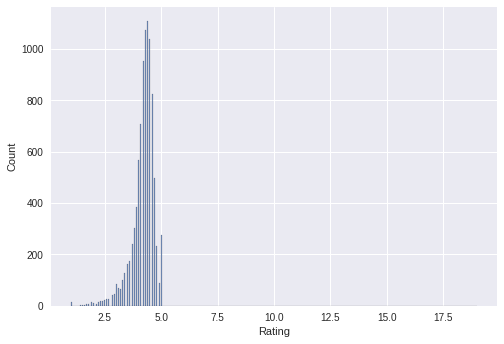

In [18]:
# Pembuatan plot untuk kolom rating
sns.histplot(x=ps['Rating'])
plt.show()

Melihat persebaran data dan juga visualisasi di atas menunjukkan kejanggalan. Rating di Play Store seharusnya memiliki nilai maksimal 5, sementara di data kita terdapat sebuah aplikasi yang memiliki Rating 19

In [19]:
# Cek aplikasi dengan rating yang lebih dari 5
ps[ps['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Ternyata hanya ada satu aplikasi yang memiliki rating di atas 5. Karena hannya ada satu data, maka menghapus data ini seharusnya tidak akan memberikan dampak berarti pada pemodelan kita nanti

In [20]:
outlier_data = ps[ps['App'] == 'Life Made WI-Fi Touchscreen Photo Frame'].index
ps.drop(outlier_data, inplace=True)

In [21]:
# Cek kembali aplikasi dengan rating yang lebih dari 5
ps[ps['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


In [22]:
ps[['Rating']].describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


Nilai Rating yang lebih dari 5 telah dibersihkan. Sekarang kita akan mengisi nilai null pada rating berdasarkan rata-rata review yang diberikan oleh user pada aplikasi dengan rating tertentu

In [23]:
# Melihat Tipe Data variable Rating dan Reviews
print('Tipe data kolom rating adalah ', ps['Rating'].dtype)
print('Tipe data kolom review adalah ', ps['Reviews'].dtype)

Tipe data kolom rating adalah  float64
Tipe data kolom review adalah  object


In [24]:
# Mengubah tipe data kolom review mwnjadi numeric
ps['Reviews'] = pd.to_numeric(ps['Reviews'])
print('Tipe data kolom review adalah ', ps['Reviews'].dtype)

Tipe data kolom review adalah  int64


In [25]:
# Review pada App rating < 1
r1 = ps['Reviews'][ps['Rating'] <=1 ].mean()
print('Rata-rata review pada aplikasi dengan rating <1 adalah: ', r1)

# Review pada App rating > 1 dan <=2
r2 = ps['Reviews'][(ps['Rating'] >1) & (ps['Rating'] <=2) ].mean()
print('Rata-rata review pada aplikasi dengan rating >1 dan <=2 adalah: ', r2)

# Review pada App rating > 2 dan <=3
r3 = ps['Reviews'][(ps['Rating'] >2) & (ps['Rating'] <=3) ].mean()
print('Rata-rata review pada aplikasi dengan rating >2 dan <=3 adalah: ', r3)

# Review pada App rating > 3 dan <=4
r4 = ps['Reviews'][(ps['Rating'] >3) & (ps['Rating'] <=4) ].mean()
print('Rata-rata review pada aplikasi dengan rating >3 dan <=4 adalah: ', r4)

# Review pada App rating < 1
r5 = ps['Reviews'][ps['Rating'] >4 ].mean()
print('Rata-rata review pada aplikasi dengan rating >4 adalah: ', r5)

Rata-rata review pada aplikasi dengan rating <1 adalah:  1.75
Rata-rata review pada aplikasi dengan rating >1 dan <=2 adalah:  258.65384615384613
Rata-rata review pada aplikasi dengan rating >2 dan <=3 adalah:  1391.228476821192
Rata-rata review pada aplikasi dengan rating >3 dan <=4 adalah:  147931.15163934426
Rata-rata review pada aplikasi dengan rating >4 adalah:  660191.2251470588


In [26]:
# Cek data dengan rating null
rating_null = ps[ps['Rating'].isnull()]
rating_null.describe()

,Rating,Reviews
count,0.0,1474.000000
mean,NaN,18.062415
std,NaN,139.912271
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,5.000000
max,NaN,3248.000000


Karena review tertinggi pada data dengan rating null hanya 3248, maka rating aplikasi dengan nilai null seharusnya tidak lebih dari 3. Oleh karena itu kita akan memberikan rating 2 pada semua rating yang bernilai null

In [27]:
ps['Rating'].fillna(2,inplace=True)
print('Jumlah rating dengan nilai null sekarang ada: ', ps['Rating'].isnull().sum())

Jumlah rating dengan nilai null sekarang ada:  0


Menghapus data null pada kolom 'Type', 'Content_Rating', 'Current_Ver', dan 'Android_Ver'

In [28]:
ps.dropna(how='any',inplace=True)

In [29]:
ps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [30]:
ps.shape

(10829, 13)

Setelah selesai dengan data Null. Sekarang data kita berjumlah 13 kolom, dan masing-masing kolom memiliki 10829 record

##**Data Preprocessing**

**Drop Unused Columns**

Di bagian ini kita akan menghapus kolom-kolom yang tidak diperlukan yaitu kolom 'Last_Updated' dan 'Current_Ver'. Sementara kolom 'Genre' juga akan kita hapus karena kita sudah memiliki kolom 'Category' sehingga kita akan fokus ke sana

In [31]:
ps.drop(['Last_Updated', 'Current_Ver', 'Genres'], inplace=True, axis=1)
ps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,4.4 and up


**Category Column**

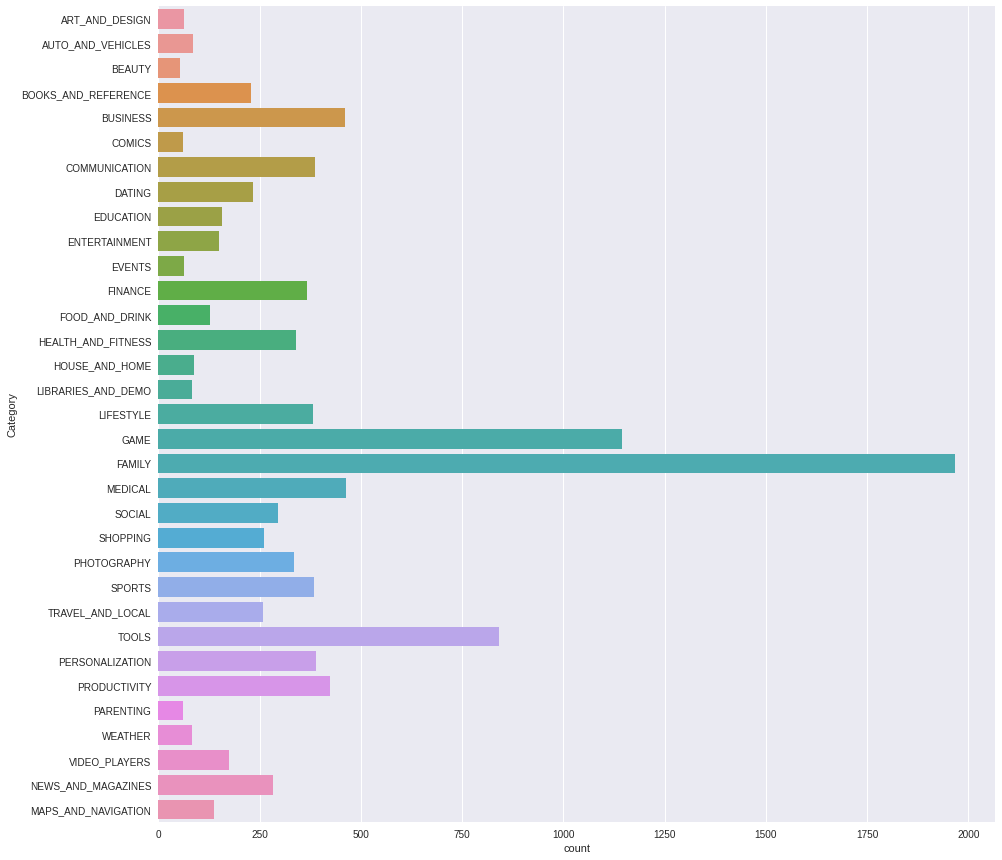

In [32]:
plt.figure(figsize=(15,15))
sns.countplot(y=ps['Category'])
plt.show()

Kolom Category memiliki informasi cukup lengkap di mana Category Family memiliki jumlah terbesar di antara semua Category

**Size Column**

Menghilangkan imbuhan M dan k di akhir Size serta mengkonversi tipe data Size menjadi numeric

In [33]:
m_size = ps['Size'][ps['Size'].str.contains('M')]

# Menghapus imbuhan M
m_size = m_size.str.replace('M', '')

# Konversi menjadi numeric
m_size = pd.to_numeric(m_size)

print('Tipe data dari m_size adalah ', m_size.dtype)
print('Jumlah data m_size ada ', m_size.shape[0])

Tipe data dari m_size adalah  float64
Jumlah data m_size ada  8823


In [34]:
k_size = ps['Size'][ps['Size'].str.contains('k')]

# Menghapus imbuhan k
k_size = k_size.str.replace('k', '')

# Konversi menjadi numeric
k_size = pd.to_numeric(k_size)

print('Tipe data dari k_size adalah ', k_size.dtype)
print('Jumlah data k_size ada ', k_size.shape[0])

Tipe data dari k_size adalah  float64
Jumlah data k_size ada  312


In [35]:
# Konversi kb ke Mb
# 1kb = 0.001Mb
k_size = k_size * 0.001

Size yang bernilai 'Varies with Device' diganti dengan nilai -1 agar menjadi numerik

In [36]:
varies = ps['Size'][ps['Size'] == 'Varies with device']
varies.replace('Varies with device',-1,inplace=True)

In [37]:
ps['Size'].shape

(10829,)

In [38]:
Size = [None for i in range(10829)]

In [39]:
# Membuat index
def index_size(data):
    for index in data.index:
        try:
            Size[index] = data.loc[index]
        except:
            print(index)

In [40]:
index_size(m_size)
index_size(k_size)
index_size(varies)

10829
10830
10831
10834
10835
10836
10837
10838
10840
10832
10833
10839


In [41]:
ps['Size'] = Size
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,4.4 and up


**Installs Column**

Mengganti kolom Installs ke tipe numerik dan menghapus tanda +

In [42]:
ps['Installs'].dtype

dtype('O')

In [43]:
ps['Installs'] = pd.to_numeric(ps['Installs'].str.replace(r'\D+','',regex=True))
ps['Installs'].dtype

dtype('int64')

**Type Column**

Melihat persebaran aplikasi gratis dan berbayar

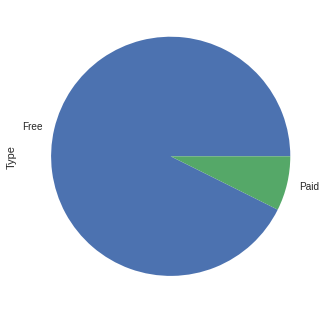

In [44]:
ps['Type'].value_counts().plot(kind='pie')
plt.show()

In [45]:
ps['Type'].value_counts()

Free    10032
Paid      797
Name: Type, dtype: int64

**Price Column**

Memastikan Price bertipe numerik dan menghapus tanda $

In [46]:
ps['Price'].value_counts()

0         10032
$0.99       146
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [47]:
ps['Price'] = ps['Price'].str.replace(r'\$','',regex=True)

In [48]:
ps['Price'] = pd.to_numeric(ps['Price'])

**Content_Rating Column**

In [49]:
ps['Content_Rating'].value_counts()

Everyone           8704
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content_Rating, dtype: int64

Karena rating 'Adults only 18+' hanya berjumlah 3 maka kita akan menggabungkannya ke rating 'Mature 17+'. Rating 'Unrated' juga akan kita gabungkan ke konten 'Everyone'

In [50]:
ps['Content_Rating'] = ps['Content_Rating'].replace(['Adults only 18+', 'Unrated'], ['Mature 17+', 'Everyone'])

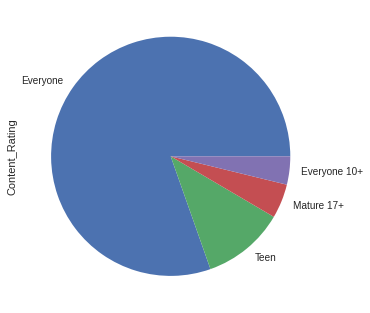

In [51]:
# Plot Content_Rating
ps['Content_Rating'].value_counts().plot(kind='pie')
plt.show()

**Android_Ver Column**

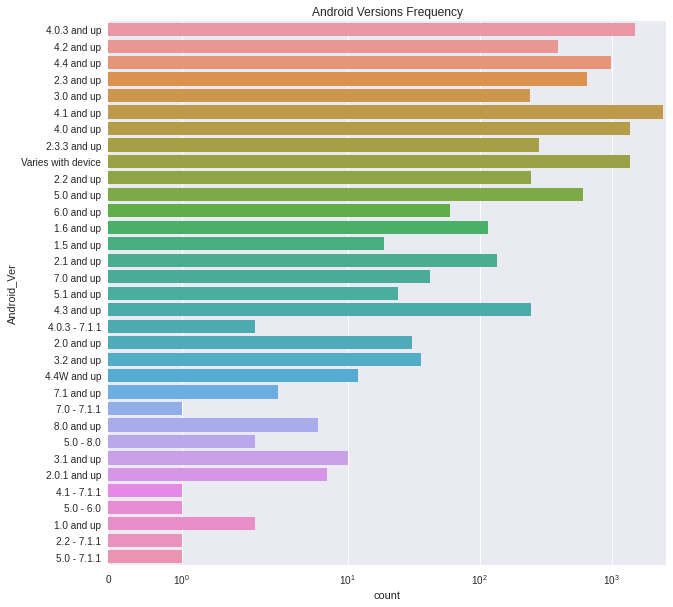

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(y=ps['Android_Ver'])
plt.xscale('symlog')
plt.title("Android Versions Frequency")
plt.show()

Karena persebaran data terlihat kurang rapi, maka untuk versi dengan jumlah aplikasi < 100 akan digabungkan menjadi satu dalam 'Other Version'

In [53]:
versions = ps['Android_Ver'].value_counts()

In [54]:
versions[versions<=100].sum()

261

In [55]:
other = versions[versions<=100].keys()
other

Index(['6.0 and up', '7.0 and up', '3.2 and up', '2.0 and up', '5.1 and up',
       '1.5 and up', '4.4W and up', '3.1 and up', '2.0.1 and up', '8.0 and up',
       '7.1 and up', '4.0.3 - 7.1.1', '5.0 - 8.0', '1.0 and up', '7.0 - 7.1.1',
       '4.1 - 7.1.1', '5.0 - 6.0', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype='object')

In [56]:
ps['Android_Ver'].replace(other,['Other Versions' for i in range(19)], inplace=True)

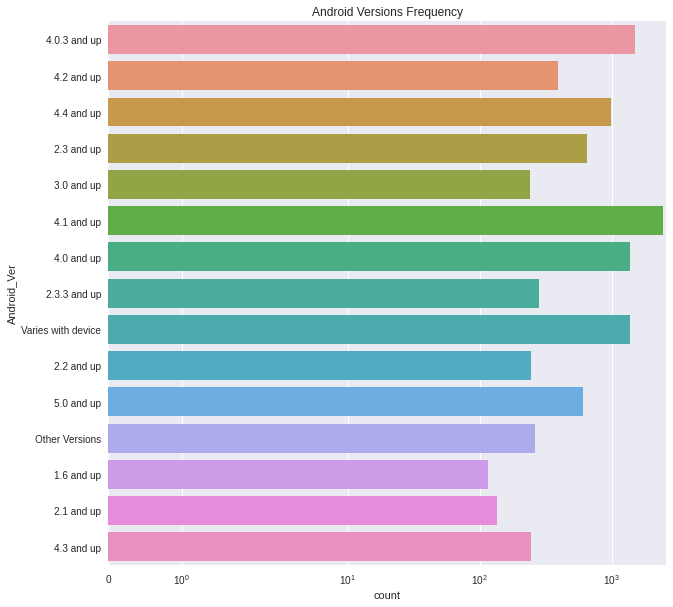

In [57]:
plt.figure(figsize=(10,10))
sns.countplot(y=ps['Android_Ver'])
plt.xscale('symlog')
plt.title("Android Versions Frequency")
plt.show()

Sekarang persebaran data terlihat lebih rapi

In [58]:
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,4.4 and up


Mengecek apakah terdapat null

In [59]:
ps.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size              12
Installs           0
Type               0
Price              0
Content_Rating     0
Android_Ver        0
dtype: int64

Ternyata kolom size memiliki 12 nilai null. Kita akan menghapus kolom-kolom tersebut

In [60]:
ps.dropna(how='any',inplace=True)

In [61]:
ps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Android_Ver       0
dtype: int64

**Clean App Duplicates Name**

Di bagian ini kita akan menghapus aplikasi-aplikasi yang memiliki nama yang sama

In [62]:
ps.drop_duplicates(subset='App',inplace=True)

##**Modelling**

In [63]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data Category
tf.fit(ps['Category']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['art_and_design',
 'auto_and_vehicles',
 'beauty',
 'books_and_reference',
 'business',
 'comics',
 'communication',
 'dating',
 'education',
 'entertainment',
 'events',
 'family',
 'finance',
 'food_and_drink',
 'game',
 'health_and_fitness',
 'house_and_home',
 'libraries_and_demo',
 'lifestyle',
 'maps_and_navigation',
 'medical',
 'news_and_magazines',
 'parenting',
 'personalization',
 'photography',
 'productivity',
 'shopping',
 'social',
 'sports',
 'tools',
 'travel_and_local',
 'video_players',
 'weather']

In [64]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(ps['Category']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(9636, 33)

In [65]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=ps.App
).sample(22, axis=1).sample(10, axis=0)

,parenting,weather,entertainment,health_and_fitness,art_and_design,video_players,finance,game,comics,medical,...,food_and_drink,libraries_and_demo,travel_and_local,events,education,personalization,house_and_home,family,auto_and_vehicles,dating
App,,,,,,,,,,,,,,,,,,,,,
Dr. Panda Art Class,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Bullshit! (Free),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AJ Cam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ch-mm Dict,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C W Browser,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zombie Catchers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Car G-Force Meter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Endress+Hauser Operations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DRAGON QUEST III,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [67]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [68]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=ps['App'], columns=ps['App'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9636, 9636)


App,BC Lotto Check,FL Drone 2,X Launcher Pro - IOS Style Theme & Control Center,4K Ultra Camera,Ben 10: Alien Experience
App,,,,,
2GIS: directory & navigator,0.0,0.0,0.0,0.0,0.0
US Army Training Courses Game,1.0,0.0,0.0,0.0,1.0
Driving Suv Toyota Car Simulator,1.0,0.0,0.0,0.0,1.0
Truck Chat & CB for Truckers,0.0,0.0,0.0,0.0,0.0
Learn C# - .Net - C Sharp Programming Tutorial App,1.0,0.0,0.0,0.0,1.0
New 2018 Keyboard,0.0,0.0,0.0,0.0,0.0
SMS Au revoir,1.0,0.0,0.0,0.0,1.0
BW Ultra,0.0,0.0,0.0,0.0,0.0
Louis CK,1.0,0.0,0.0,0.0,1.0


In [69]:
def app_recom(app_name, similarity_data=cosine_sim_df, items=ps[['App', 'Category', 'Type', 'Content_Rating', 'Rating']], k=5):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,app_name].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(app_name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [70]:
ps[ps['App'] == 'Sketch - Draw & Paint']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Android_Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,4.2 and up


In [71]:
app_recom('Sketch - Draw & Paint')

,App,Category,Type,Content_Rating,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,4.1
1,Popsicle Sticks and Similar DIY Craft Ideas,ART_AND_DESIGN,Free,Everyone,4.2
2,Paint Splash!,ART_AND_DESIGN,Free,Everyone,3.8
3,How To Draw Food,ART_AND_DESIGN,Free,Everyone,4.3
4,Little Teddy Bear Colouring Book Game,ART_AND_DESIGN,Free,Everyone,4.2


In [73]:
ps[ps['App'] == 'Online Girls Chat']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Android_Ver
688,Online Girls Chat,DATING,4.8,5323,4.9,50000,Free,0.0,Mature 17+,4.0.3 and up


In [74]:
app_recom('Online Girls Chat')

,App,Category,Type,Content_Rating,Rating
0,"2Date Dating App, Love and matching",DATING,Free,Mature 17+,4.4
1,Live Girls Talk - Free Video Chat,DATING,Free,Mature 17+,4.8
2,Girls Live Chat - Free Text & Video Chat,DATING,Free,Mature 17+,4.8
3,Live Talk - Free Text and Video Chat,DATING,Free,Mature 17+,4.6
4,Chat Kids - Chat Room For Kids,DATING,Free,Mature 17+,4.7


In [75]:
ps[ps['App'] == 'Mini for Facebook lite']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Android_Ver
10231,Mini for Facebook lite,SOCIAL,4.1,260,3.3,10000,Free,0.0,Teen,3.0 and up


In [76]:
app_recom('Mini for Facebook lite')

,App,Category,Type,Content_Rating,Rating
0,BIGO LIVE - Live Stream,SOCIAL,Free,Teen,4.4
1,Facebook,SOCIAL,Free,Teen,4.1
2,CJ Gospel Hour,SOCIAL,Free,Everyone,5.0
3,Digi-TV.ch,SOCIAL,Free,Teen,2.0
4,DP Display Pictures Life Quotes Motivational GM,SOCIAL,Free,Everyone,4.4


Dari rekomendasi-rekomendasi di atas, sistem yang kita buat sudah sangat baik dengan memberikan rekomendasi aplikasi-aplikasi yang memiliki 'Category' yang sama